In [ ]:
!pip install prophet

In [ ]:
!pip install pandas_datareader

In [3]:
import pandas as pd
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [4]:
# Python
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [5]:
# Python
m = Prophet()
m.fit(df)



11:40:37 - cmdstanpy - INFO - Chain [1] start processing
11:40:38 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()


,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [7]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.206964,7.464231,8.845713
3266,2017-01-16,8.531958,7.819757,9.288173
3267,2017-01-17,8.319376,7.632514,9.025087
3268,2017-01-18,8.151991,7.393968,8.929573
3269,2017-01-19,8.163908,7.465480,8.907266


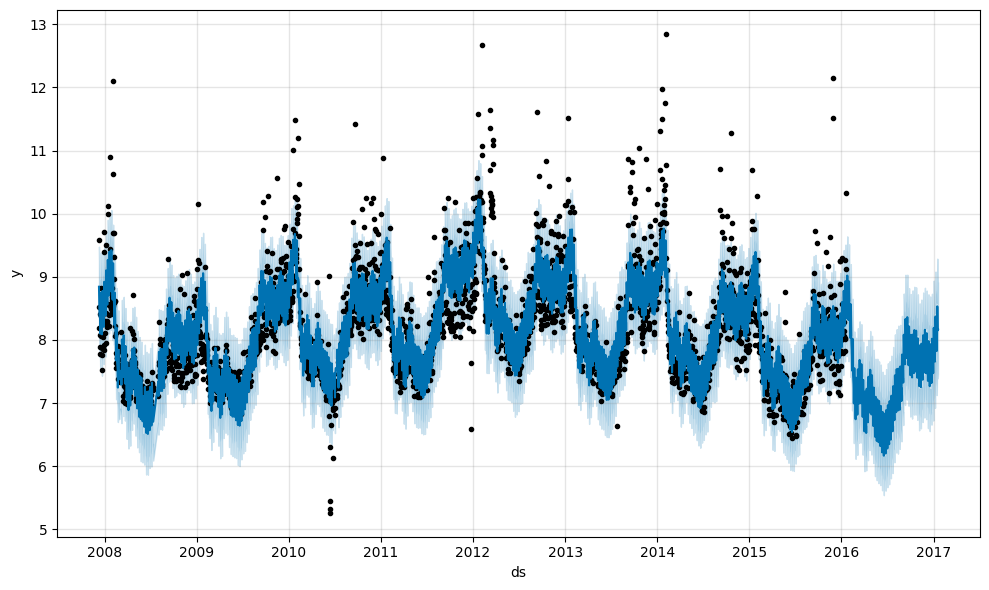

In [8]:
# Python
fig1 = m.plot(forecast)


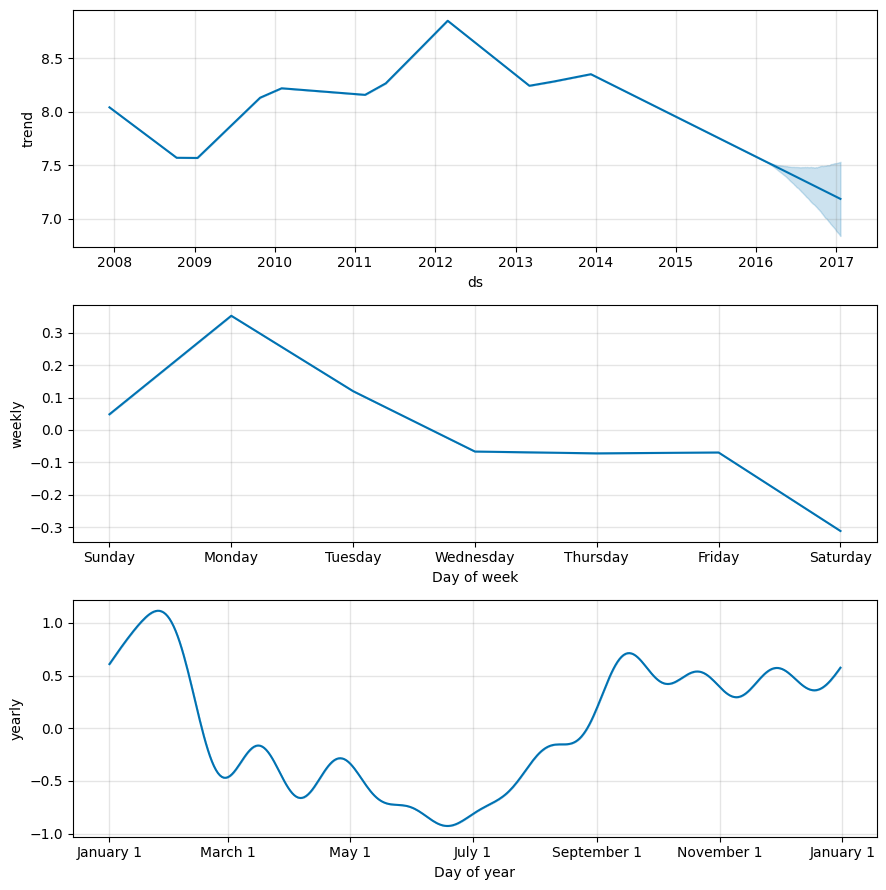

In [9]:
# Python
fig2 = m.plot_components(forecast)



In [15]:
import pandas as pd

df = pd.read_csv("AAPL.csv")

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...,...
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700


In [16]:
df['ds'] = df['Date']
df['y'] = df['Close']

In [17]:
data = df[['ds', 'y']]
data = data[-1000:]
data.head()

,ds,y
9409,2018-04-06,42.095001
9410,2018-04-09,42.512501
9411,2018-04-10,43.312500
9412,2018-04-11,43.110001
9413,2018-04-12,43.535000


In [18]:
from prophet import Prophet

prophet_m = Prophet().fit(data)

13:09:22 - cmdstanpy - INFO - Chain [1] start processing
13:09:22 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future = prophet_m.make_future_dataframe(periods = 365)
future.tail()

,ds
1360,2023-03-20
1361,2023-03-21
1362,2023-03-22
1363,2023-03-23
1364,2023-03-24


In [20]:
future.head()

,ds
0,2018-04-06
1,2018-04-09
2,2018-04-10
3,2018-04-11
4,2018-04-12


In [23]:
forecast = prophet_m.predict(future)
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,trend,yhat,yhat_lower,yhat_upper
1360,2023-03-20,209.074662,203.235916,153.882404,250.479269
1361,2023-03-21,209.186894,203.599460,155.298389,252.179227
1362,2023-03-22,209.299127,203.830865,154.366822,252.547160
1363,2023-03-23,209.411360,203.785625,155.682274,253.071785
1364,2023-03-24,209.523593,203.701564,152.974929,251.759714


In [24]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1360,2023-03-20,209.074662,153.882404,250.479269,160.379348,256.859821,-5.838746,-5.838746,-5.838746,1.094609,1.094609,1.094609,-6.933355,-6.933355,-6.933355,0.0,0.0,0.0,203.235916
1361,2023-03-21,209.186894,155.298389,252.179227,160.291350,257.151299,-5.587434,-5.587434,-5.587434,1.363380,1.363380,1.363380,-6.950814,-6.950814,-6.950814,0.0,0.0,0.0,203.599460
1362,2023-03-22,209.299127,154.366822,252.547160,160.198580,257.654360,-5.468262,-5.468262,-5.468262,1.484611,1.484611,1.484611,-6.952874,-6.952874,-6.952874,0.0,0.0,0.0,203.830865
1363,2023-03-23,209.411360,155.682274,253.071785,160.176530,257.934126,-5.625735,-5.625735,-5.625735,1.314735,1.314735,1.314735,-6.940470,-6.940470,-6.940470,0.0,0.0,0.0,203.785625
1364,2023-03-24,209.523593,152.974929,251.759714,160.065500,258.211993,-5.822029,-5.822029,-5.822029,1.092401,1.092401,1.092401,-6.914430,-6.914430,-6.914430,0.0,0.0,0.0,203.701564


# Prophet에서 사용하는 주요 메소드들
- fit(df)
    - Prophet 모델에 데이터를 적합시키는 메소드입니다. df는 예측할 시계열 데이터로, ds(날짜)와 y(값)를 포함하는 데이터프레임입니다.
- predict(future)
    - 주어진 미래 데이터를 기반으로 예측을 수행하는 메소드입니다. future는 예측할 기간에 대한 날짜 정보를 포함하는 데이터프레임으로, Prophet은 이를 사용해 미래의 값을 예측합니다.
- make_future_dataframe(periods=n)
    - 미래 예측을 위한 날짜 데이터프레임을 생성합니다. n은 예측할 기간의 길이를 나타내며, 예측하고자 하는 날짜 범위에 해당합니다.
- add_seasonality(name, period, fourier_order)
    - 사용자 정의 계절성을 추가하는 메소드입니다. name은 계절성의 이름, period는 계절성의 주기(예: 365.25), fourier_order는 푸리에 급수의 차수를 지정합니다. 이를 통해 기본 제공되는 연간, 주간 계절성 외에 추가적인 주기 패턴을 모델에 반영할 수 있습니다.
- plot(fcst)
    - Prophet 모델의 예측 결과를 시각화하는 메소드입니다. 예측된 값(fcst)을 시각적으로 표현하며, 추세, 계절성, 변화점 등을 직관적으로 확인할 수 있습니다.
- plot_components(fcst)
    - Prophet 모델의 각 성분(추세, 계절성, 휴일 효과 등)을 분해하여 시각화하는 메소드입니다. 이 메소드를 통해 각 성분이 시계열에 어떻게 기여하는지 확인할 수 있습니다.
- add_country_holidays(country_name = 'KR')
    - 나라의 공휴일들을 이용하려면 이미 제공되고 있는 나라에 포함되는지 확인 후 add_country_holidays의 country_name에 해당하는 나라의 이름을 입력하면 된다.

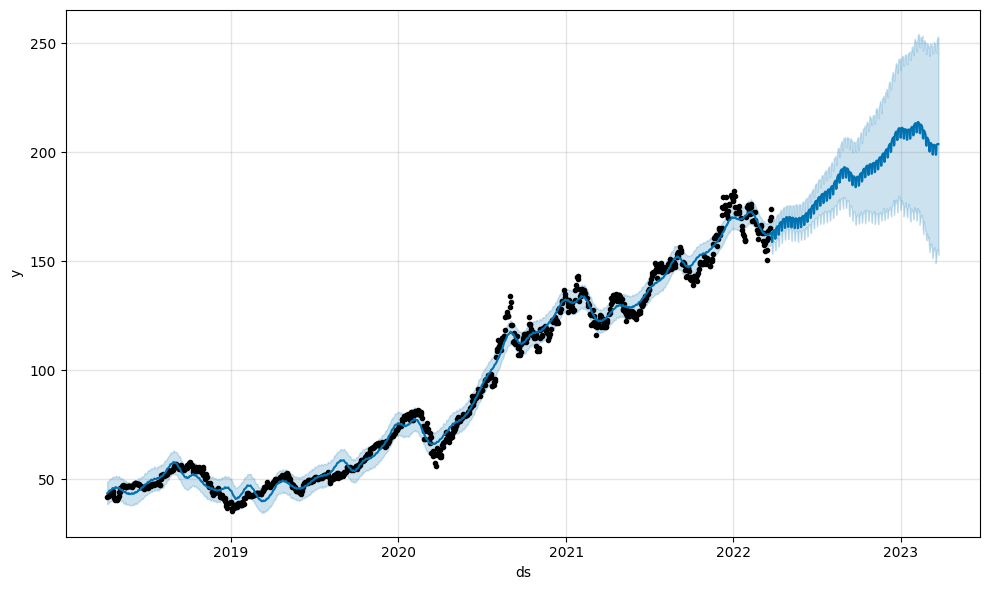

In [27]:
prophet_m.plot(forecast);

In [26]:
import pandas as pd

path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header = 0)
print(df.shape)
df.head()

(108, 2)


,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


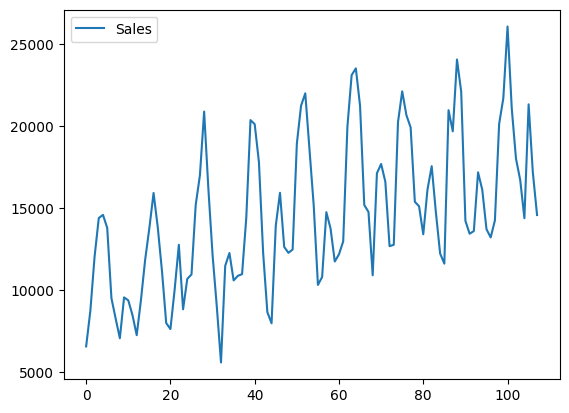

In [28]:
from matplotlib import pyplot

df.plot()
pyplot.show()

In [31]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

df.head()

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [32]:
from prophet import Prophet

model = Prophet()
model.fit(df)

13:36:53 - cmdstanpy - INFO - Chain [1] start processing
13:36:53 - cmdstanpy - INFO - Chain [1] done processing


#### In sample forecast

In [34]:
last_1year = list()
for i in range(1, 13):
    last_1year.append(['1968-%02d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds'] = pd.to_datetime(last_1year['ds'])

In [35]:
last_1year.head()

,ds
0,1968-01-01
1,1968-02-01
2,1968-03-01
3,1968-04-01
4,1968-05-01


In [36]:
forecast = model.predict(last_1year)

In [37]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1968-01-01,14365.838146,12883.001194,15973.203133
1,1968-02-01,14940.305749,13380.369001,16493.660790
2,1968-03-01,20882.028850,19249.993602,22429.968107
3,1968-04-01,22900.416536,21256.533040,24315.663805
4,1968-05-01,24201.080202,22761.349857,25661.444356


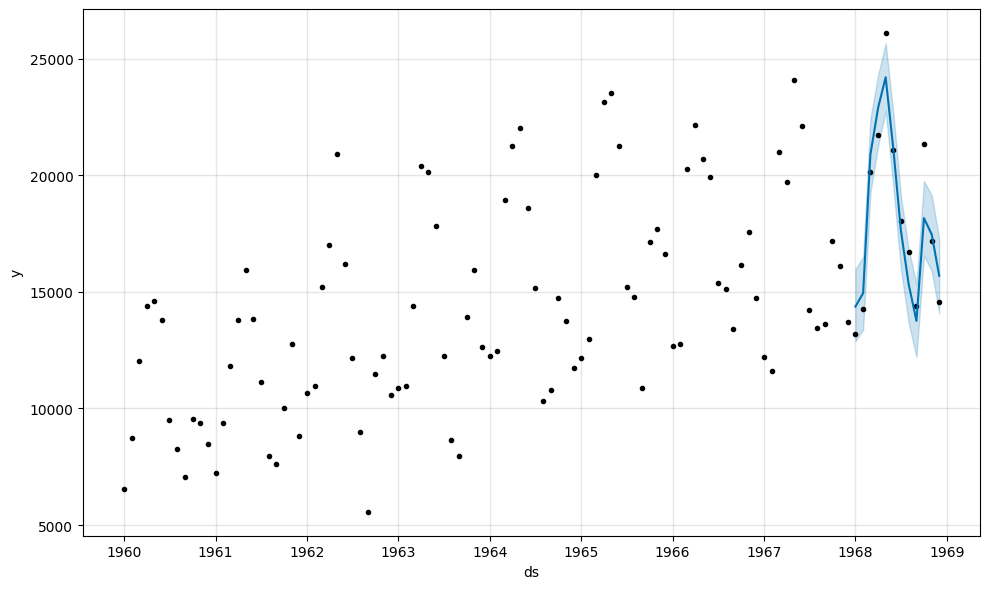

In [38]:
model.plot(forecast)
pyplot.show()

#### Out of sample forecast

In [39]:
last_1year = list()
for i in range(1, 13):
    last_1year.append(['1969-%02d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds'] = pd.to_datetime(last_1year['ds'])

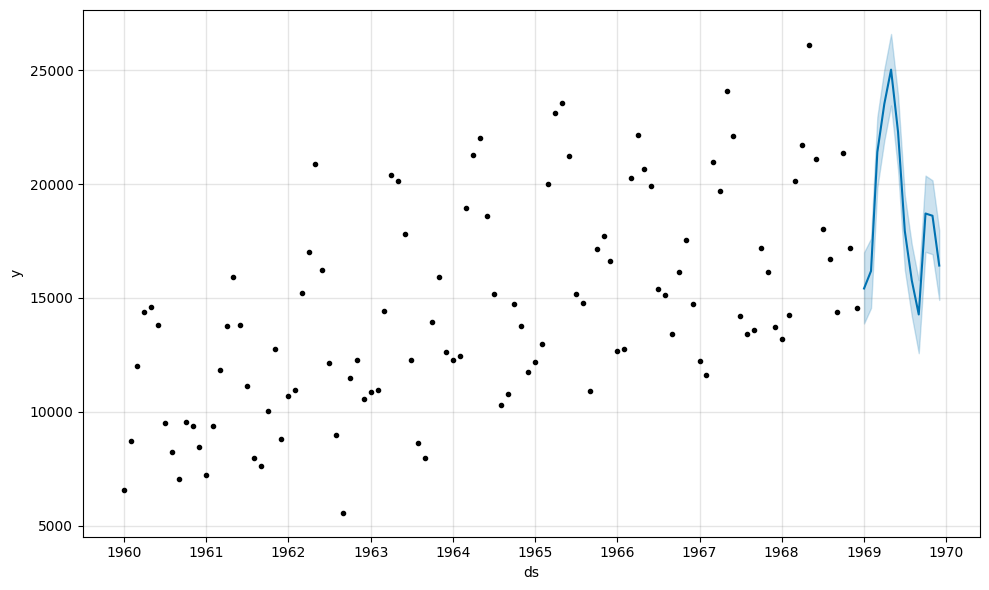

In [40]:
forecast  = model.predict(last_1year)

model.plot(forecast)
pyplot.show()

In [41]:
last_1year = list()
for i in range(1,13):
    last_1year.append(['1969-%02d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds'] = pd.to_datetime(last_1year['ds'])

#### 성능평가

In [42]:
train = df.drop(df.index[-12:])
y_true = df['y'][-12:].values

model = Prophet()
model.fit(train)

last_1year = list()
for i in range(1, 13):
    last_1year.append(['1968-%02d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds'] = pd.to_datetime(last_1year['ds'])

forecast = model.predict(last_1year)
y_pred = forecast['yhat'].values

13:50:49 - cmdstanpy - INFO - Chain [1] start processing
13:50:50 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_true, y_pred)

print('MAE: %.3f' % mae)

MAE: 1336.813


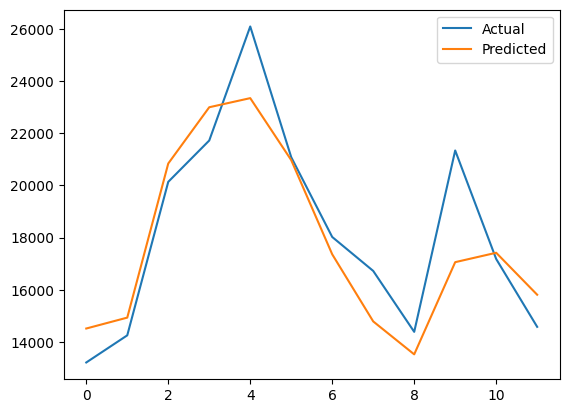

In [46]:
pyplot.plot(y_true, label = 'Actual')
pyplot.plot(y_pred, label = 'Predicted')
pyplot.legend()
pyplot.show()

In [47]:
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rc

rc('font', family = 'Malgun Gothic')

In [48]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range('2017-01-01', periods = 365*2, freq = 'D')
df = pd.DataFrame({'ds' : ds,
                  'y' : result})

df.head()

,ds,y
0,2017-01-01,0.000000
1,2017-01-02,0.103243
2,2017-01-03,0.205382
3,2017-01-04,0.305326
4,2017-01-05,0.402007


In [49]:
m = Prophet(yearly_seasonality = True, daily_seasonality = True)
m.fit(df)

14:12:09 - cmdstanpy - INFO - Chain [1] start processing
14:12:09 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

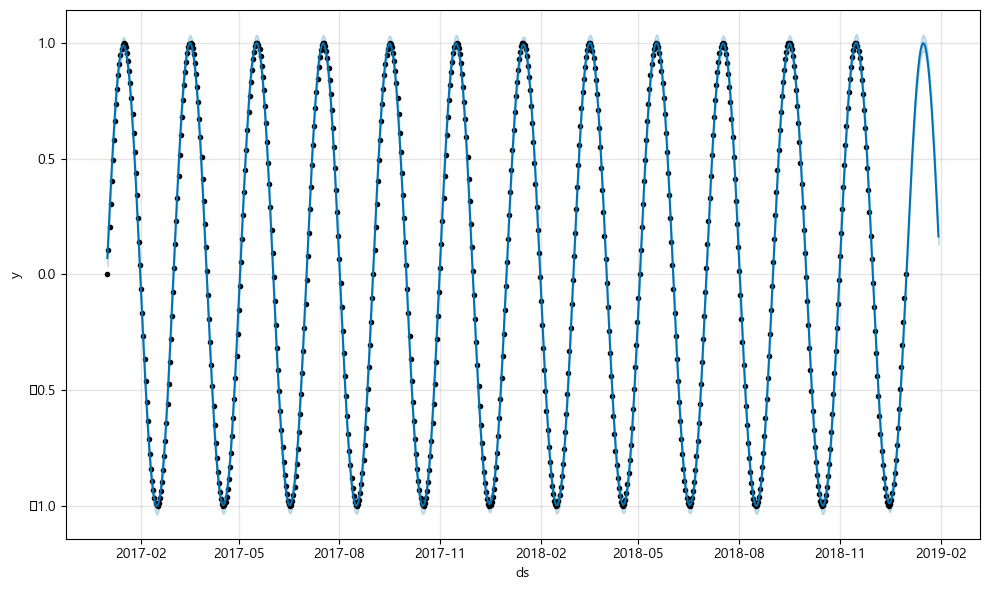

In [52]:
m.plot(forecast);

<Axes: >

C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


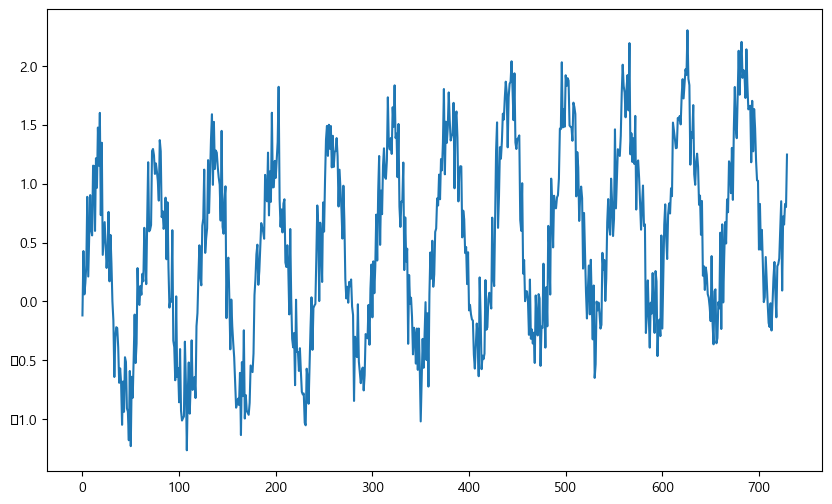

In [53]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2) / 4
ds = pd.date_range('2017-01-01', periods = 365*2, freq = 'D')
df = pd.DataFrame({'ds' : ds,
                  'y' : result})

df['y'].plot(figsize = (10, 6))

In [54]:
m = Prophet(yearly_seasonality = True, daily_seasonality = True)
m.fit(df)

14:18:29 - cmdstanpy - INFO - Chain [1] start processing
14:18:29 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

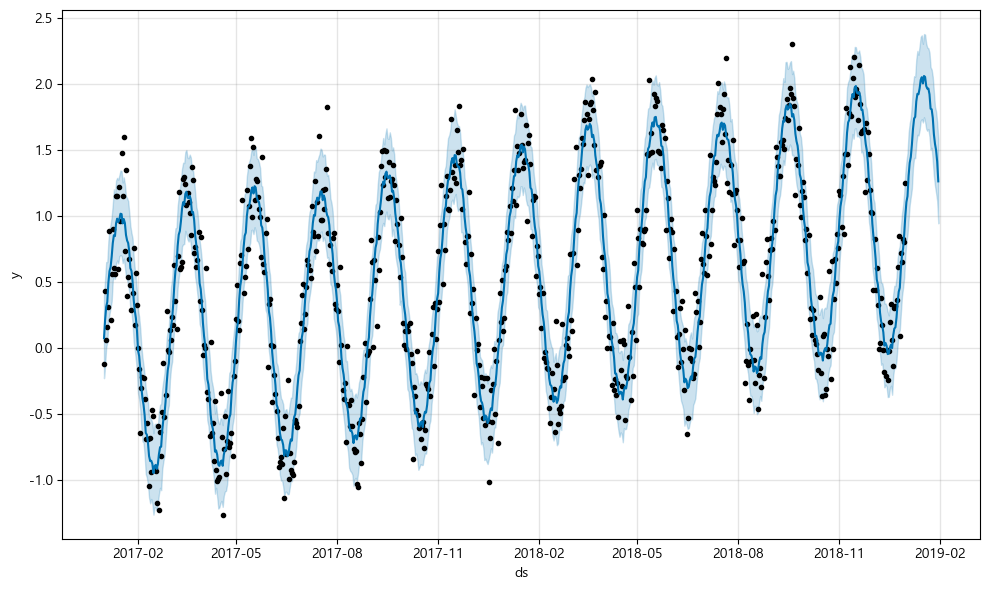

In [56]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
m.plot(forecast);